# 0. Loading libraries and Classes

In [23]:
# Import pandas and numpy libraries
import pandas as pd

import warnings
warnings.simplefilter("ignore")

from IPython.display import Image

# Import train_test_split to separate train and test set
from sklearn.model_selection import train_test_split
# Import OneHotEncoder for one hot encoding 
from sklearn.preprocessing import OneHotEncoder
# Import LabelEncoder for target feature encoding
from sklearn.preprocessing import LabelEncoder

### Why should we use Encoding ? 

As we already know, we can't throw the data right away into machine learning models. We need to treat them in a specific way, so our model's algorithm can work with them. **The algorithm and the numbers are like best friends**, so when it comes to values represented as a string, there is an issue. `scikit learn`, an industry-standard library using for machine learning, does not accept categorical values represented as strings as well. 

Imagine we have categorical variables stored as string in the dataset. For understanding how the encoding looks like, here's a simple example.

In [24]:
# Run this code
dataframe = pd.DataFrame({'id': range(8), 'amount': [15,85,17,22,56,84,15,48],
                          'color':['black','white','black','black','white','white','black','black'],
                          })
mapping = {'black': 1,
          'white':0}
# Mapping values
mapped_df = dataframe['color'].map(mapping)
# Comparison
map_dataframe = pd.concat([dataframe, mapped_df], axis = 1)
map_dataframe

,id,amount,color,color
0,0,15,black,1
1,1,85,white,0
2,2,17,black,1
3,3,22,black,1
4,4,56,white,0
5,5,84,white,0
6,6,15,black,1
7,7,48,black,1


The unique categories of 'color' column have been converted into numerical form as 1 when the 'black' category is present and 0 otherwise. Of course, encoding categorical features using mapping or replacing can be very tedious and not effective if we have many categorical features and corresponding categories. Fortunately, you can find several encoding methods that serve for different encoding challenges. Let's move on...

-------

Categorical variables take only limited numbers of possible values/categories and must be converted into a numerical form. We should perform this converting over **the training data** and propagate them to the unseen data (for example holdout data). 

**This approach's main reason is that we do not know whether the future data will have all the categories present in the training data**. There could also be fewer or more categories. Therefore the encoders must learn patterns from the training data and use those learned categories in both training and testing sets.

In this notebook we will use Titanic and Mushrooms datasets. 

In [25]:
# Load Titanic dataset using columns 'Survived','Sex','Embarked','Cabin' and store it in 'data'
data = pd.read_csv('Data/titanic_data.csv', usecols = ['Survived','Sex','Embarked','Cabin'])
data.head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C85,C
2,1,female,NaN,S
3,1,female,C123,S
4,0,male,NaN,S


Only for this demonstration, let's capture only the first letter of Cabin because there are many categories.

In [26]:
# Capture only first letter of Cabin using .str[0] 
data['Cabin'] = data['Cabin'].str[0]
data.head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C,C
2,1,female,NaN,S
3,1,female,C,S
4,0,male,NaN,S


Now we split our data into training and testing set.

In [27]:
# Separate the DataFrame into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Sex', 'Embarked','Cabin']],  
                                                    data['Survived'],  
                                                    test_size = 0.3,  
                                                    random_state = 42)
# Get the shape of training and testing set
X_train.shape, X_test.shape

((623, 3), (268, 3))

### Cardinality the of categorical features

Let's explore how many unique values has each of the categorical features.

In [28]:
# Get the unique values of categorical features
for column in X_train.columns:
    print(column)
    print(X_train[column].unique())

Sex
['male' 'female']
Embarked
['S' 'C' 'Q' nan]
Cabin
['A' nan 'C' 'F' 'E' 'G' 'B' 'D' 'T']


We'll look at the methods for encoding these categories and how these methods handle missing values present in the data.


# 1. One-Hot Encoding with Pandas

We can use Pandas method `pd.get_dummies()` to encode the categorical features. In the real world, this encoding method shouldn't be used in ML pipelines (computationally and memory ineffective), however in case of some simple data analysis, you should be able to use it. We'll look at how it works and what are the advantages and limitations.

In [29]:
# Get the dummy variables of feature 'Embarked' using pd.get_dummies() 
dummies = pd.get_dummies(X_train['Sex'])
dummies.head()

,female,male
445,0,1
650,0,1
172,1,0
450,0,1
314,0,1


In [30]:
type(dummies)

pandas.core.frame.DataFrame

The main advantages are that `get_dummies()` returns a DataFrame and preserved feature names for dummy variables. Also, we can use this method even if our data contain missing values. 

Here was created 1 column for the female category and 1 column for the male category according to its presence. We can compare created dummy variables to the original 'Sex' variable using concatenation to see what happened.

In [31]:
# Concat the original Series 'Sex' from X_train with created dummy variables Series
result = pd.concat([X_train['Sex'], pd.get_dummies(X_train['Sex'])], axis = 1)
result

,Sex,female,male
445,male,0,1
650,male,0,1
172,female,1,0
450,male,0,1
314,male,0,1
...,...,...,...
106,female,1,0
270,male,0,1
860,male,0,1
435,female,1,0


In [32]:
# TASK 1 >>>> Get dummy variables for column 'Embarked'
#             Concat the original 'Embarked' Series with created dummy variables Series
#             Store it in variable result_2
result_2 = pd.concat([X_train['Embarked'], pd.get_dummies(X_train['Embarked'])], axis = 1)
result_2

,Embarked,C,Q,S
445,S,0,0,1
650,S,0,0,1
172,S,0,0,1
450,S,0,0,1
314,S,0,0,1
...,...,...,...,...
106,S,0,0,1
270,S,0,0,1
860,S,0,0,1
435,S,0,0,1


**Encoding into *k*-1 dummy variables**

Categorical variables should be encoded by creating *k*-1 binary variables. What does it mean, and why should we use it? 

Here *k* represents the number of distinct categories. In the feature 'Sex' there are 2 categories of gender: male or female, so *k* = 2. We only need to create 1 binary variable (*k*-1 = 1) and still have all the information we need. In other words, if the value is 0 in all the binary variables, then it must be 1 in the final (not present) binary variable.
For example, if we have the variable with 5 categories (*k* = 5), we would create 4 binary variables (*k* - 1 = 4). 

This approach helps to eliminate the redundancy of the information. 

To create *k*-1 dummy variables we specify parameter `drop_first = True` to drop first binary variable.

In [33]:
dummies_2 = pd.get_dummies(X_train['Sex'], drop_first = True)
dummies_2

,male
445,1
650,1
172,0
450,1
314,1
...,...
106,0
270,1
860,1
435,0


If we create dummy variables for the entire dataset, the prefixes (variables names) will be generated automatically. It doesn't return only 'male', but also the variable's name.

In [34]:
# Get dummy variable for entire train set
dummy_data = pd.get_dummies(X_train, drop_first = True)
dummy_data

,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
445,1,0,1,0,0,0,0,0,0,0
650,1,0,1,0,0,0,0,0,0,0
172,0,0,1,0,0,0,0,0,0,0
450,1,0,1,0,0,0,0,0,0,0
314,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
106,0,0,1,0,0,0,0,0,0,0
270,1,0,1,0,0,0,0,0,0,0
860,1,0,1,0,0,0,0,0,0,0
435,0,0,1,1,0,0,0,0,0,0


In [35]:
# TASK 2 >>>> Get dummy variable for entire test set
dummy_data_2 = pd.get_dummies(X_test, drop_first = True)
dummy_data_2

,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
709,1,0,0,0,0,0,0,0,0
439,1,0,1,0,0,0,0,0,0
840,1,0,1,0,0,0,0,0,0
720,0,0,1,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
821,1,0,1,0,0,0,0,0,0
633,1,0,1,0,0,0,0,0,0
456,1,0,1,0,0,0,1,0,0
500,1,0,1,0,0,0,0,0,0


**KEY LEARNING** We can notice that training and testing sets have a different number of created dummy variables. In the testing set, there is no category Cabin T. Therefore dummy variables for this category can not be created. As the training set and the testing set must be of the same shape, `scikit learn's` models won't accept these as inputs. **Our entire modeling pipeline can fail because of this! We did not save the "state" of how many dummies should leave this part.** The pipeline fails, model does not predict, money are lost, people scream in panic, senior engineers debug over night and protesters burn the cars in the streets. I think you get the point.

# 2. One-Hot Encoding with Scikit-learn

`sklearn.preprocessing` module offers `OneHotEncoder()` class that encodes categorical features by creating binary columns for each unique category of variables using a one-hot encoding scheme. The output is not a DataFrame, but a NumPy array. You can find the documentation of OneHotEncoder [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

----
Firstly we need to create the encoder object, where we can specify a set of parameters.
Then we'll fit OneHotEncoder to X_train set, where we have to fill in missing values as OneHotEncoder doesn't except those. Using `.categories_` attribute, we'll find all of the determined categories. 

Before we start with scikit, don't forget that we need to get rid of missing values. Let's just replace them with a string "missing".

In [65]:
X_train = X_train.fillna('Missing')
X_test = X_test.fillna('Missing')

Now we get to scikit. If you are confused over the word "sparse", don't worry. It is just a cool concept of how we can store a matrix in a more memory efficient way.

In [66]:
# Create the encoder
# Set parameter categories = 'auto' to determine categories automatically from training set
# Set parameter sparse = False to return dense array 
# Set parameter handle_unknown = 'error' to raise an error if an unknown categorical feature is present during transform
encoder = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown = 'error')

#  Fit the encoder 
encoder.fit(X_train)

OneHotEncoder(sparse=False)

In [37]:
# We can get used categories with the .categories_ attribute
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Missing', 'Q', 'S'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Missing', 'T'], dtype=object)]

To transform X_train using our encoder, we need to fill in missing values again. Since the output will be NumPy array, we'll convert it to pandas DataFrame. 

In [38]:
# Transform X_train using encoder 
training_set = encoder.transform(X_train)
# Convert X_train to a DataFrame
pd.DataFrame(training_set).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


As we can see, after transforming the data, the names of the features are not returned, which is inconvenient for feature exploration. There is the method for retrieving these names `.get_feature_names()` that we apply on the columns. Let's repeat the entire process of transforming.

In [39]:
# Transform X_train using one-hot encoding and return feature names
training_set = encoder.transform(X_train)
training_set = pd.DataFrame(training_set)
training_set.columns = encoder.get_feature_names()
training_set.head()

,x0_female,x0_male,x1_C,x1_Missing,x1_Q,x1_S,x2_A,x2_B,x2_C,x2_D,x2_E,x2_F,x2_G,x2_Missing,x2_T
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
# TASK 2 >>>> Transform X_test using one-hot encoding in the same way as we did with X_train
#             Inspect the first 5 rows to see the result
testing_set = encoder.transform(X_test)
testing_set = pd.DataFrame(training_set)
testing_set.columns = encoder.get_feature_names()
testing_set.head()

,x0_female,x0_male,x1_C,x1_Missing,x1_Q,x1_S,x2_A,x2_B,x2_C,x2_D,x2_E,x2_F,x2_G,x2_Missing,x2_T
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Notice that after encoding, the training set and testing set have the same number of features. 

# 3. Encoding target variable

For encoding the target variable stored as a string datatype, we can use `LabelEncoder` class from `scikit learn` module. Label Encoder normalizes labels to have values between 0 and n_classes-1. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder).

Let's look at the simple example of using this class on dog breeds. Firstly we create LabelEncoder object, and then we fit our data.

In [41]:
# Create LabelEncoder object
label_encoder = LabelEncoder()

In [42]:
# Fit data using label_encoder
label_encoder.fit(['Border Collie','Dachshund','Irish Setter','Papillon','Pug',
                   'Pembroke Welsh Corgi','Dachshund','Hokkaido','Pug'])

LabelEncoder()

*Fun fact*

Did you know that the delicious Hokkaido pumpkin soup is not made out of Hokkaido in our dataset? This breed actually really exists :)

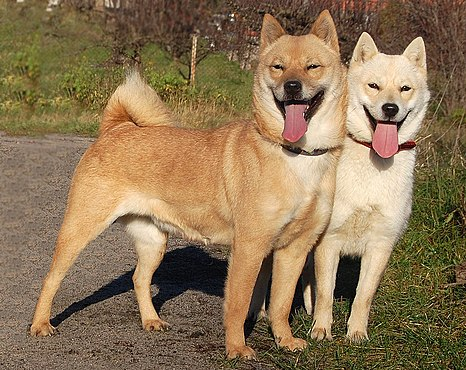

In [64]:
# :) Run this 
Image('Image/hokkaido.jpg')

In [44]:
# After we fitted our data we can access the used categories
list(label_encoder.classes_)

['Border Collie',
 'Dachshund',
 'Hokkaido',
 'Irish Setter',
 'Papillon',
 'Pembroke Welsh Corgi',
 'Pug']

In [45]:
# Transform the data
encoded_labels = label_encoder.transform(['Border Collie','Dachshund','Irish Setter','Papillon','Pug',
                                          'Pembroke Welsh Corgi','Dachshund','Hokkaido','Pug'])
encoded_labels

array([0, 1, 3, 4, 6, 5, 1, 2, 6], dtype=int64)

Instead of two binary values (0 and 1), we now have the sequence of the numbers that have not ascended order. The reason for it is that the numbering is assigned in alphabetical order.

-------

### TASK
Now it's your turn to encode categorical variables in the Mushrooms classification dataset.

In [46]:
# Run this code to create a list of selected features
cols_to_use = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
               'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
               'stalk-shape', 'stalk-root', 'stalk-surface-above-ring']

In [47]:
# Load the dataset 'Data/mushrooms.csv' and store it in mushrooms
# Specify parameter usecols = cols_to_use
mushrooms = pd.read_csv('Data/mushrooms.csv', usecols = cols_to_use)
# Get the first 5 rows
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring
0,p,x,s,n,t,p,f,c,n,k,e,e,s
1,e,x,s,y,t,a,f,c,b,k,e,c,s
2,e,b,s,w,t,l,f,c,b,n,e,c,s
3,p,x,y,w,t,p,f,c,n,n,e,e,s
4,e,x,s,g,f,n,f,w,b,k,t,e,s


In [49]:
# Get the unique values for all of the features in mushrooms that will be encoded
for column in mushrooms.columns:
    print(column)
    print(mushrooms[column].unique())

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']


You should see that one of the unique values there is '?' in column stalk-root. Replace this incorrectly stored value with 'Missing'.

In [50]:
# Use .replace() method to replace '?' with 'Missing'
mushrooms['stalk-root'] = mushrooms['stalk-root'].replace('?','Missing')

In [51]:
# Split mushrooms into training and testing set
# Set test_size = 0.3
# Set random_state = 42
X_train, X_test, y_train, y_test = train_test_split(mushrooms[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                                                               'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                                                               'stalk-shape', 'stalk-root', 'stalk-surface-above-ring']], 
                                                    mushrooms['class'], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Get the shape of X_train and X_test
X_train.shape, X_test.shape

((5686, 12), (2438, 12))

In [52]:
# TASK >>>> Create OneHotEncoder object where the categories will be automatically determined, the result will be dense array and 
# if an unknown categorical feature will be present during transform it will raise 'error'
encoder = OneHotEncoder(categories = 'auto',
                        sparse = False,
                        handle_unknown = 'error')

In [53]:
# TASK >>>> Fit X_train set using encoder
encoder.fit(X_train)

OneHotEncoder(sparse=False)

In [54]:
# TASK >>>> Get the use categories
encoder.categories_

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
 array(['f', 'g', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object),
 array(['a', 'f'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['Missing', 'b', 'c', 'e', 'r'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object)]

In [55]:
# TASK >>>> Transform X_train set and convert it to pandas DataFrame
# Get the feature names and inspect the changes after transforming
X_train = encoder.transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = encoder.get_feature_names()
X_train

,x0_b,x0_c,x0_f,x0_k,x0_s,x0_x,x1_f,x1_g,x1_s,x1_y,...,x9_t,x10_Missing,x10_b,x10_c,x10_e,x10_r,x11_f,x11_k,x11_s,x11_y
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5684,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# TASK >>>> Transform X_test set and convert it to pandas DataFrame
# Get the feature names and inspect the changes after transforming
X_test = encoder.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = encoder.get_feature_names()
X_test

,x0_b,x0_c,x0_f,x0_k,x0_s,x0_x,x1_f,x1_g,x1_s,x1_y,...,x9_t,x10_Missing,x10_b,x10_c,x10_e,x10_r,x11_f,x11_k,x11_s,x11_y
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2434,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2435,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2436,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Our target feature 'class' needs to be also encoded. To do so, use LabelEncoder.

In [57]:
# TASK >>>> Create LabelEncoder object and store it in variable labels_encoder
labels_encoder = LabelEncoder()

In [58]:
# TASK >>>> Fit y_train using labels_encoder
labels_encoder.fit(y_train)

LabelEncoder()

In [59]:
# Print used categories
labels_encoder.classes_

array(['e', 'p'], dtype=object)

In [60]:
# TASK >>>> Transform y_train data and assign to y_train
y_train = labels_encoder.transform(y_train)

In [61]:
# Print y_train
y_train

array([1, 0, 1, ..., 0, 1, 0])

In [62]:
# TASK >>>> Fit and transform also y_test data in the same way
labels_encoder.fit(y_test)
y_test = labels_encoder.transform(y_test)
y_test

array([0, 1, 1, ..., 1, 0, 0])